In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#.csv loader
def load_csv_data(path =  "notebook/datasets/DP_LIVE_21112022133845200.csv"):
    data = pd.read_csv(path)
    return data

In [8]:
#extract g-20 inflation data within relevant time interval
def get_location_data(data, loc = 'G-20'):
    new_data = data[data["LOCATION"] == loc]
    new_data = new_data[new_data["TIME"] <= "2021-08"]
    return new_data

In [9]:
#extract the relevant columns from inflation data
def extract_time_value(data):
    return data[["TIME", "Value"]].reset_index(drop = True)

In [10]:
#extract relevant time interval from commodity data and adjust month column to make it compatable with inflation data
def get_relevant_time(data):
    data = data[data["Month"] >= "2018-05-01"]
    data["Month"] = data["Month"].str[0:7]
    data = data.reset_index(drop = True)
    return data

In [11]:
def merge_datasets(g20_data, commodity_data):
     commodity_data.insert(loc = len(commodity_data.columns), column = "Value", value = g20_data["Value"].values)
     return commodity_data

In [12]:
#plot time vs inflation
def plot_time_vs_inflation_G20(data):
    fig = plt.figure(figsize=(20,5))
    plt.plot(data["Month"], data["Value"],"o-", label = "Inflation of G-20 countries")
    plt.xticks(rotation = 45)
    plt.legend(loc = 'upper left')
    plt.title("Time_vs_InflationG20")
    plt.show()
    fig.savefig("notebook/plots/individual_time_vs_inflationG20/Time_vs_InflationG20")

In [13]:
#plot time vs chosen commodity price
def plot_time_vs_commodity_price(data, commodity):
    fig = plt.figure(figsize=(20,5))
    plt.plot(data["Month"], data[commodity], "o-",label = "Price of " + commodity)
    plt.xticks(rotation = 45)
    plt.legend(loc = 'upper left')
    plt.title("Time_vs_Price_"+commodity)
    plt.show()
    fig.savefig("notebook/plots/individual_time_vs_commodity/Time_vs_Price_"+commodity)

In [14]:
def plot_time_vs_commdity_prices_all(data, columns = ['Crude oil, average', 'Natural gas index', 'Cocoa', 'Orange', 'Gold', 'Sugar, world']):
    for c in columns:
        plot_time_vs_commodity_price(data, c)
    plt.show()

In [15]:
def plot_commodity_prices_together(data, columns = ['Crude oil, average', 'Natural gas index', 'Cocoa', 'Orange', 'Gold', 'Sugar, world']):
    fig = plt.figure(figsize=(20,5))
    for c in columns:
        plt.plot(data["Month"], data[c], label = "Price of " + c)
        plt.xticks(rotation = 45)
        plt.legend(loc = 'upper right')
    plt.yscale("log")
    plt.title("Time vs Price(log scale)")
    plt.show()
    fig.savefig("notebook/plots/commodity_comparison/commodity_prices_together")

In [16]:
def plot_pct_change(data, columns = ['Crude oil, average', 'Natural gas index', 'Cocoa', 'Orange', 'Gold', 'Sugar, world', 'Value']):
    fig = plt.figure(figsize=(20,5))
    pct_change = data[columns].pct_change()
    alphas = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
    i = 0
    for c in columns:
        if c == 'Value':
            plt.plot(data["Month"], pct_change[c],label = "Pct change of Inflation Value", alpha = alphas[i])
        else:
            plt.plot(data["Month"], pct_change[c],label = "Pct change of " + c, alpha = alphas[i])
        plt.xticks(rotation = 45)
        plt.legend(loc = 'upper right')
        i = i+1
    plt.title("Time vs Pct changes")
    plt.show()
    fig.savefig("notebook/plots/commodity_comparison/pct_changes_together")

In [17]:
def plot_value_vs_commodity(data, commodity):
    fig = plt.figure(figsize=(20,5))
    cols = ["Value", commodity]
    pct_change = data[cols].pct_change()
    for c in cols:
        if c == 'Value':
            plt.plot(data["Month"], pct_change[c], "o-", label = "Pct change of Inflation Value" )
        else:
            plt.plot(data["Month"], pct_change[c], "o-", label = "Pct change of " + c)
        plt.xticks(rotation = 45)
        plt.legend(loc = 'upper right')
    plt.title("Time vs Pct change of InflatonG20 and " + commodity)
    plt.show()
    fig.savefig("notebook/plots/commodity_comparison/pct_change_inflation_and_" + commodity)

In [18]:
def plot_value_vs_commodities(data, columns = ['Crude oil, average', 'Natural gas index', 'Cocoa', 'Orange', 'Gold', 'Sugar, world']):
    for c in columns:
        plot_value_vs_commodity(data, c)

In [19]:
#inflation data
inflation_data = load_csv_data(path =  "notebook/datasets/DP_LIVE_21112022133845200.csv")

In [20]:
#commodities price data
commodity_data = load_csv_data(path = "notebook/datasets/commodity_prices_august_2021.csv")

In [ ]:
g20_data = get_location_data(inflation_data)
g20_data = extract_time_value(g20_data)
commodity_data = get_relevant_time(commodity_data)
data_all = merge_datasets(g20_data, commodity_data)
commodities = ['Crude oil, average', 'Natural gas index', 'Cocoa', 'Orange', 'Gold', 'Sugar, world']

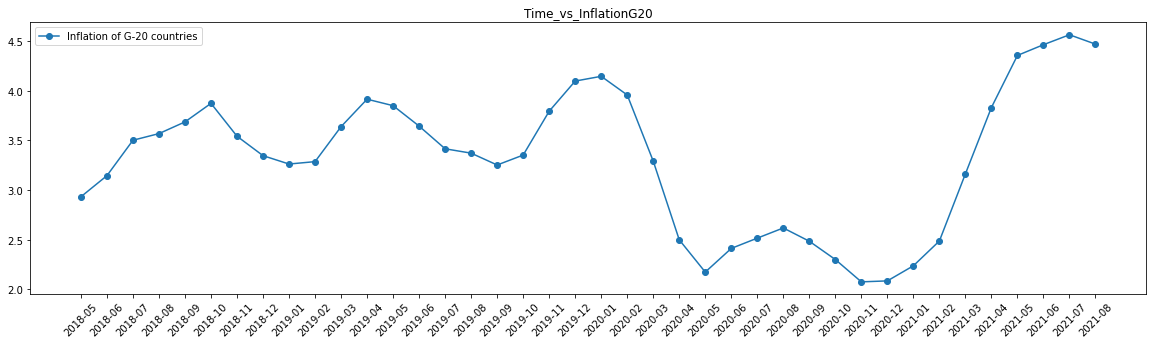

In [23]:
plot_time_vs_inflation_G20(data_all)

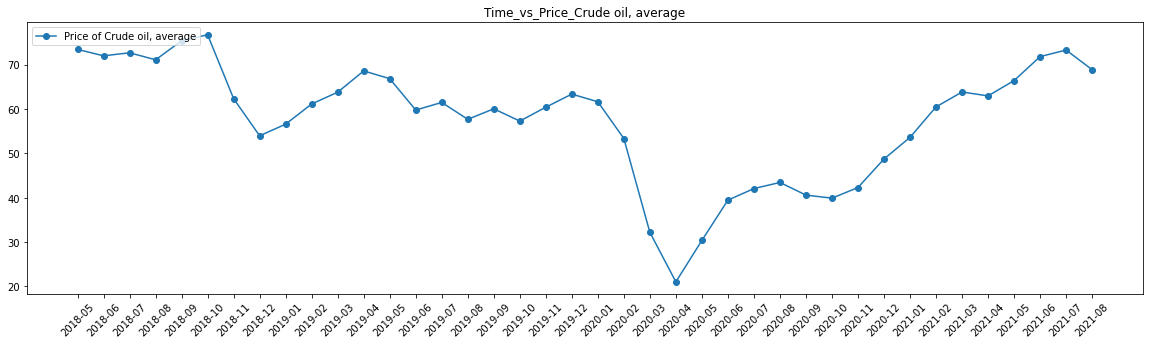

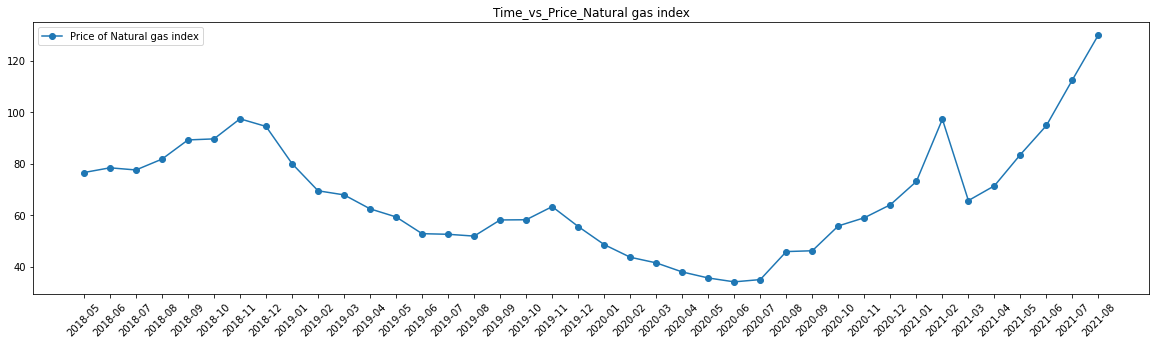

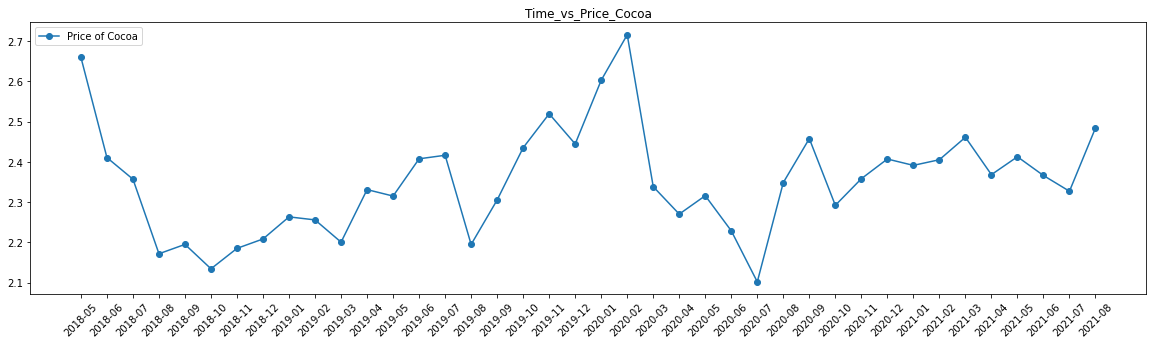

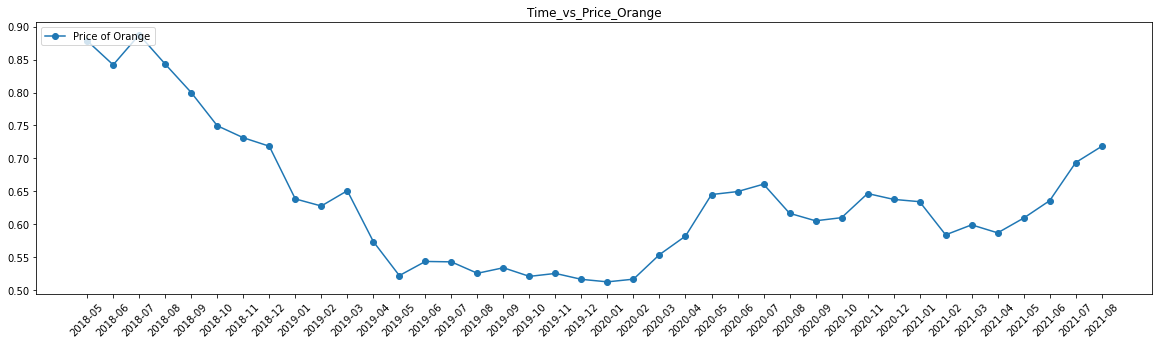

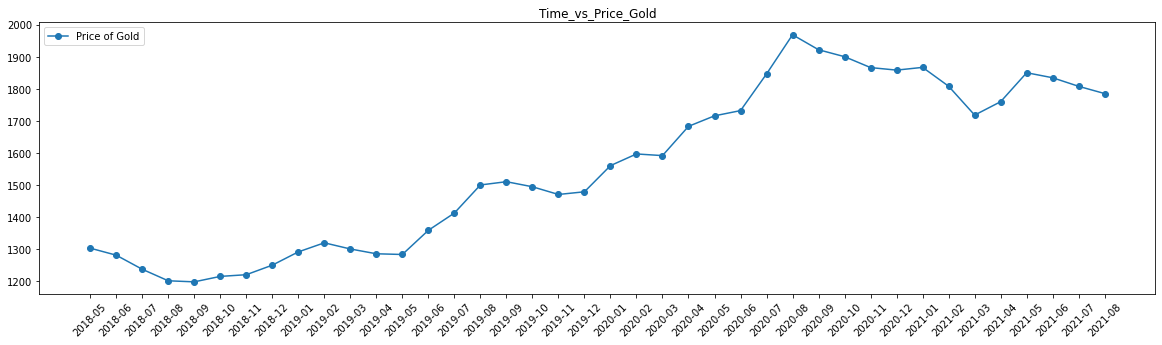

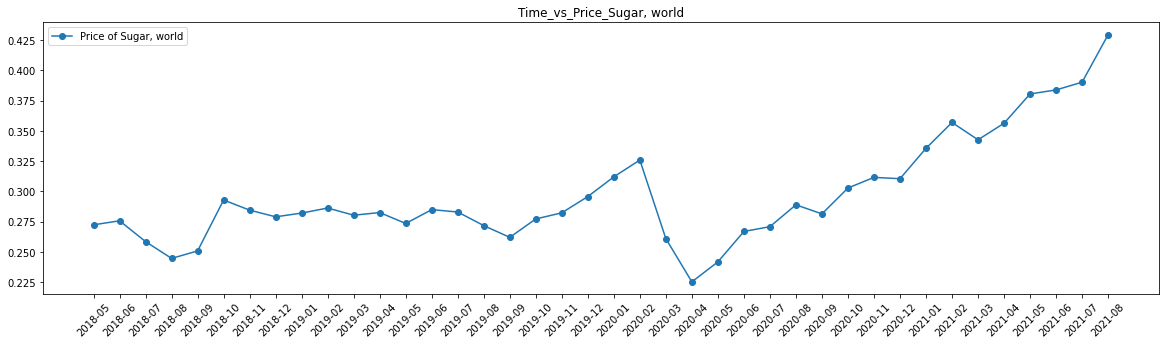

In [24]:
plot_time_vs_commdity_prices_all(data_all, commodities)

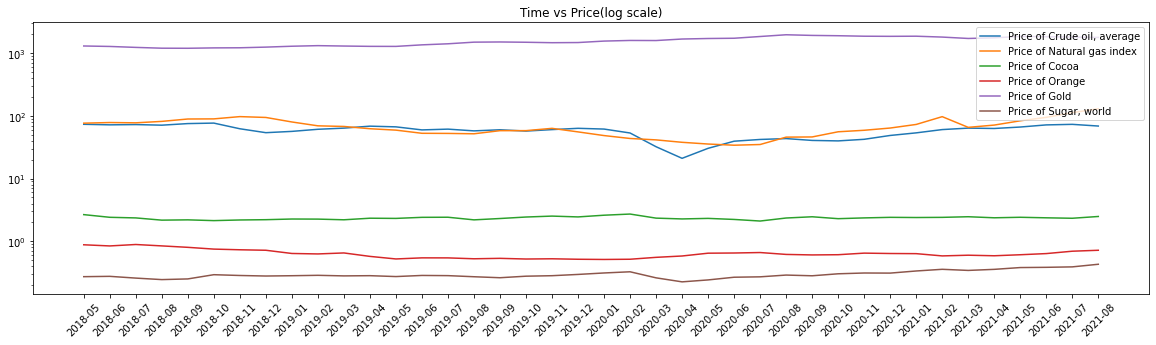

In [25]:
plot_commodity_prices_together(data_all, commodities)

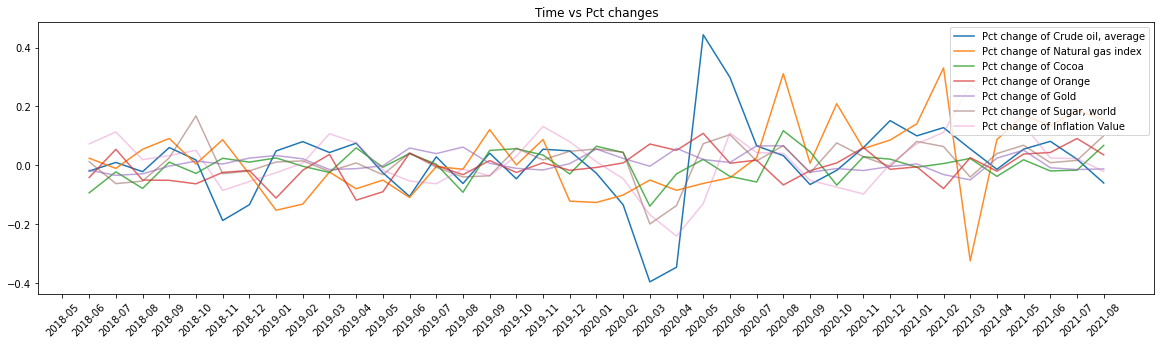

In [26]:
plot_pct_change(data_all)

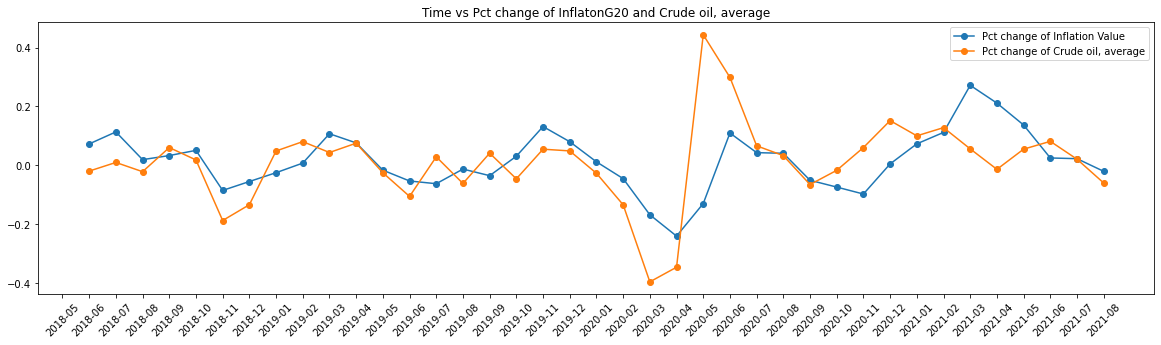

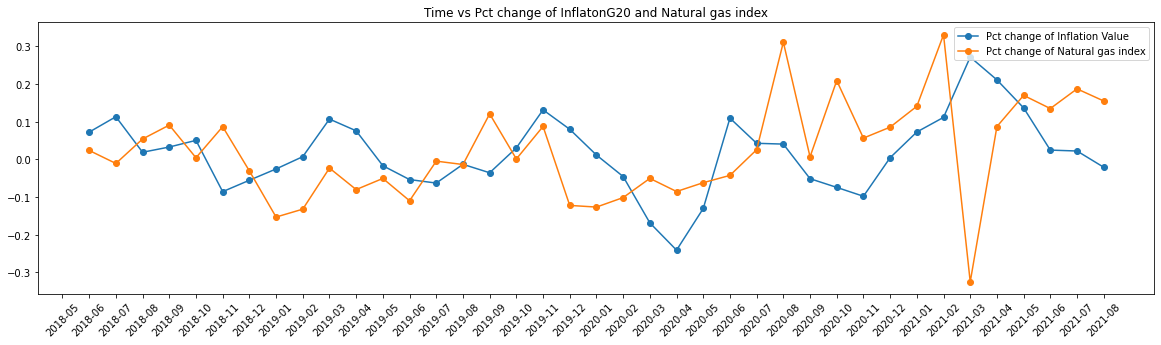

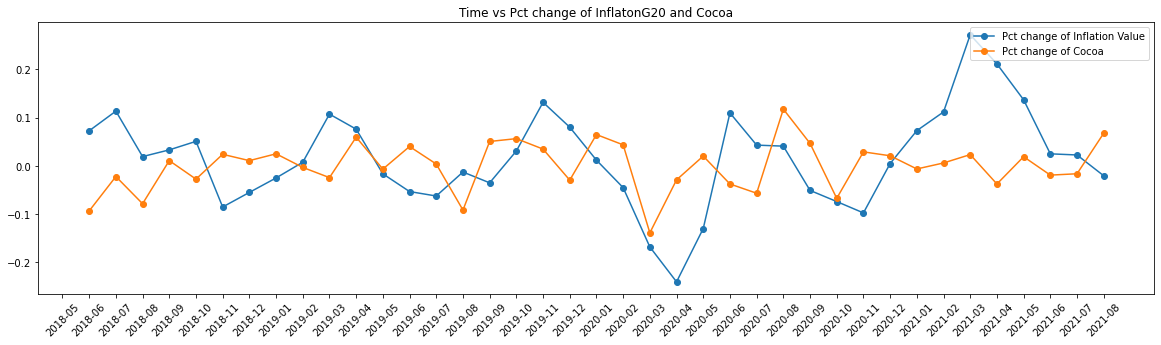

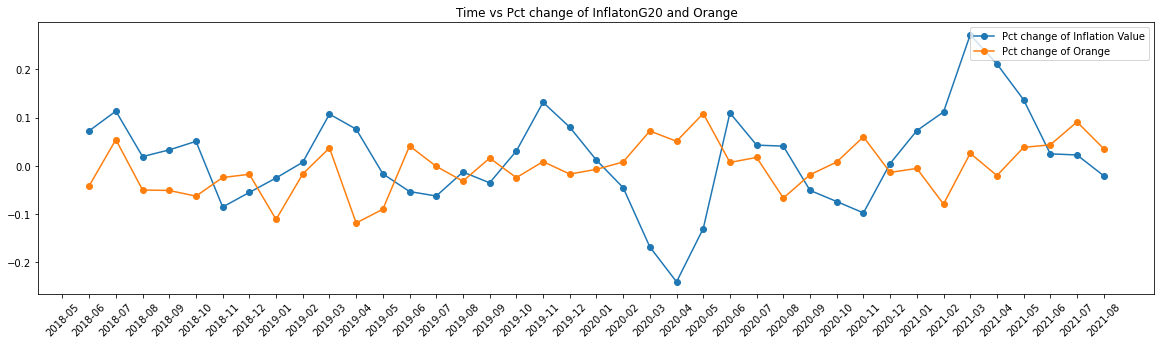

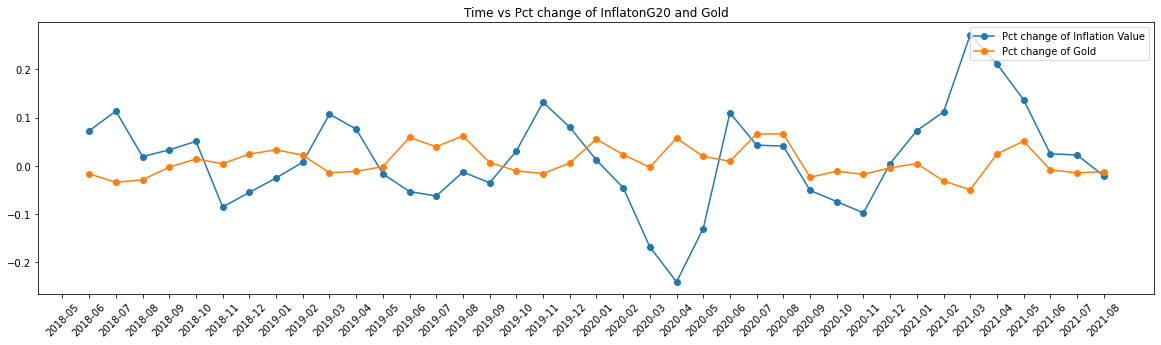

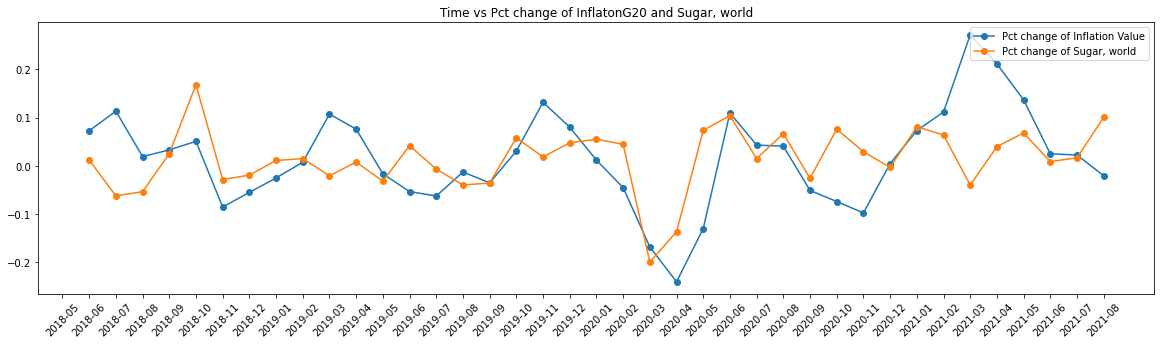

In [27]:
plot_value_vs_commodities(data_all)